In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp
import einops as ein
import jax
import jax.numpy as jnp
import numpy as np

is_dark = True
theme, cs = rp.mpl_setup(is_dark)

In [2]:
from pyxtal import Group
from pymatgen.core import SymmOp

plane_groups = []

for sg in range(1, 231):
    gp = Group(sg).Wyckoff_positions[0]
    if all(np.allclose(op.affine_matrix[2], [0, 0, 1, 0]) for op in gp.ops):
        plane_groups.append(Group(sg))

[g.symbol for g in plane_groups]

['P1',
 'Pm',
 'Cm',
 'Pmm2',
 'Pma2',
 'Pba2',
 'Cmm2',
 'P4',
 'P4mm',
 'P4bm',
 'P3',
 'P3m1',
 'P31m',
 'P6',
 'P6mm']

In [3]:
from collections import defaultdict

all_wps = defaultdict(list)
total = 0

for sg in map(Group, range(1, 231)):
    for op in sg.Wyckoff_positions[0].ops:
        total += 1
        all_wps[op.as_xyz_str()].append(sg.symbol)

len(all_wps), total

(989, 4425)

In [4]:
from collections import defaultdict

wps = defaultdict(list)

for pg in plane_groups:
    for op in pg.Wyckoff_positions[0].ops:
        wps[op.as_xyz_str()].append(pg.symbol)

wps

defaultdict(list,
            {'x, y, z': ['P1',
              'Pm',
              'Cm',
              'Pmm2',
              'Pma2',
              'Pba2',
              'Cmm2',
              'P4',
              'P4mm',
              'P4bm',
              'P3',
              'P3m1',
              'P31m',
              'P6',
              'P6mm'],
             'x, -y, z': ['Pm', 'Cm', 'Pmm2', 'Cmm2', 'P4mm'],
             'x+1/2, y+1/2, z': ['Cm', 'Cmm2'],
             'x+1/2, -y+1/2, z': ['Cm', 'Pba2', 'Cmm2', 'P4bm'],
             '-x, -y, z': ['Pmm2',
              'Pma2',
              'Pba2',
              'Cmm2',
              'P4',
              'P4mm',
              'P4bm',
              'P6',
              'P6mm'],
             '-x, y, z': ['Pmm2', 'Cmm2', 'P4mm'],
             'x+1/2, -y, z': ['Pma2'],
             '-x+1/2, y, z': ['Pma2'],
             '-x+1/2, y+1/2, z': ['Pba2', 'Cmm2', 'P4bm'],
             '-x+1/2, -y+1/2, z': ['Cmm2'],
             '-y, x, z': ['P4', 'P4m

In [5]:
wp_names = sorted(wps.keys(), key=lambda x: -len(wps[x]))
wp_m = [SymmOp.from_xyz_str(name).affine_matrix[:2, [0, 1, 3]] for name in wp_names]
wp_m = jnp.array(wp_m)

wp_w = np.zeros((len(plane_groups), len(wp_names)))

groups = [pg.symbol for pg in plane_groups]

for i, name in enumerate(wp_names):
    for group_sym in wps[name]:
        wp_w[groups.index(group_sym), i] = 1

wp_w = jnp.array(wp_w)

print(wp_w)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 0. 0.

In [6]:
import gpjax as gpx
from tensorflow_probability.substrates import jax as tfp
from dataclasses import dataclass
from jaxtyping import (
    Array,
    Float,
)
import optax as ox
from gpjax.base.param import param_field
from simple_pytree import static_field
from jax.nn import softmax

jax.config.update('jax_enable_x64', True)

tfb = tfp.bijectors

weights = softmax(jnp.zeros(wp_w.shape[0]))

wp_w_normed = wp_w / wp_w.sum(axis=1, keepdims=True)
wp_pair = (wp_w[:, :, None] * wp_w[:, None, :]).reshape(-1, wp_w.shape[-1] ** 2)
wp_pair_normed = wp_pair / wp_pair.sum(axis=1, keepdims=True)

ndim = 2

bias = wp_m[..., -1]
linear = wp_m[..., :-1]
# x_frac = ein.einsum(linear, x, 'wp d1 d2, d2 -> wp d1') + bias

def orbit(pt):
    return ein.einsum(linear, pt, 'wp d1 d2, d2 -> wp d1') + bias

dtype = jnp.float64

def field(f):
    return param_field(jnp.array(f), bijector=tfb.SoftClip(0.9 * f, 1.1 * f))

def period_kern(active_dims):
    return gpx.kernels.Periodic(
        active_dims=active_dims,
        lengthscale=jnp.array(0.1),
        period=jnp.array(1.0),
        variance=jnp.array(0.2))

@dataclass
class GroupKernel(gpx.kernels.AbstractKernel):
    group_weights: jax.Array = param_field(default=weights.astype(dtype), bijector=tfb.UnitVector())
    x_kern: gpx.kernels.AbstractKernel = param_field(default=period_kern([0]), trainable=False)
    y_kern: gpx.kernels.AbstractKernel = param_field(default=period_kern([1]), trainable=False)

    def periodic_kern(self, x: jax.Array, y: jax.Array):
        return self.x_kern(x, y) * self.y_kern(x, y)

    def __call__(
        self, x: Float[Array, "1 D"], y: Float[Array, "1 D"]
    ) -> Float[Array, "1"]:
        x_frac = orbit(x)
        # x_frac = x[None, ...]
        y_frac = orbit(y)
        frac_kern = jax.vmap(jax.vmap(self.periodic_kern, in_axes=(0, None)), in_axes=(None, 0))(x_frac, y_frac).reshape(-1)
        kern_totals = frac_kern
        return self.group_weights @ wp_pair_normed @ kern_totals


print(GroupKernel()(jnp.array([0.2, 0.2]), jnp.array([0.2, 0.2])))
print(GroupKernel()(jnp.array([0.2, 0.1]), jnp.array([0.1, 0.2])))

2024-04-16 21:06:25.724798: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


0.011783453144643501
0.001667408370305424


In [7]:
ngrid = 16
step = (ngrid + 1) * 1j
xy = jnp.mgrid[0:1:step, 0:1:step][:, :-1, :-1].reshape(2, -1).T

ni = 50
print(xy[ni])

kernel = GroupKernel()

gram = GroupKernel().gram(xy).to_dense()

print(jnp.linalg.cholesky(gram) + 1e-2 * jnp.eye(gram.shape[0]))
mat = gram[ni]
plt.scatter(xy[:, 0], xy[:, 1], c=mat)
plt.colorbar()

[0.1875 0.125 ]


2024-04-16 21:06:38.809594: W external/tsl/tsl/framework/bfc_allocator.cc:482] Allocator (GPU_0_bfc) ran out of memory trying to allocate 288.00MiB (rounded to 301989888)requested by op 
2024-04-16 21:06:38.809651: W external/tsl/tsl/framework/bfc_allocator.cc:494] *******************************************************************************_____________________
E0416 21:06:38.809686 3862999 pjrt_stream_executor_client.cc:2809] Execution of replica 0 failed: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 301989888 bytes.
BufferAssignment OOM Debugging.
BufferAssignment stats:
             parameter allocation:  288.00MiB
              constant allocation:         0B
        maybe_live_out allocation:  288.00MiB
     preallocated temp allocation:         0B
                 total allocation:  576.00MiB
              total fragmentation:         0B (0.00%)
Peak buffers:
	Buffer 1:
		Size: 288.00MiB
		Entry Parameter Subshape: f64[256,256,24,24]

	Buffer 2:
		Size: 288.00MiB

ValueError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 301989888 bytes.
BufferAssignment OOM Debugging.
BufferAssignment stats:
             parameter allocation:  288.00MiB
              constant allocation:         0B
        maybe_live_out allocation:  288.00MiB
     preallocated temp allocation:         0B
                 total allocation:  576.00MiB
              total fragmentation:         0B (0.00%)
Peak buffers:
	Buffer 1:
		Size: 288.00MiB
		Entry Parameter Subshape: f64[256,256,24,24]
		==========================

	Buffer 2:
		Size: 288.00MiB
		Operator: op_name="jit(fn)/jit(main)/mul" source_file="/tmp/ipykernel_3862999/1112281934.py" source_line=51
		XLA Label: fusion
		Shape: f64[256,256,24,24]
		==========================

	Buffer 3:
		Size: 8B
		Entry Parameter Subshape: f64[]
		==========================



In [42]:
Group('Cm').Wyckoff_positions[0]

Wyckoff position 4b in space group 8 with site symmetry 1
x, y, z
x, -y, z
x+1/2, y+1/2, z
x+1/2, -y+1/2, z

In [43]:
Group('P3').Wyckoff_positions[0]

Wyckoff position 3d in space group 143 with site symmetry 1
x, y, z
-y, x-y, z
-x+y, -x, z

In [44]:
groups

['P1',
 'Pm',
 'Cm',
 'Pmm2',
 'Pma2',
 'Pba2',
 'Cmm2',
 'P4',
 'P4mm',
 'P4bm',
 'P3',
 'P3m1',
 'P31m',
 'P6',
 'P6mm']

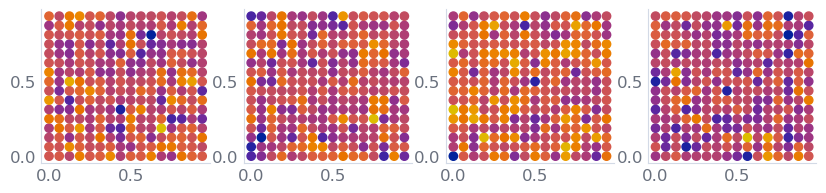

(0.0, 1.0)

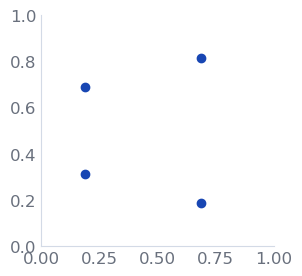

In [64]:
X = jnp.array(Group('Cm').Wyckoff_positions[0].apply_ops([11/16, 3/16, 0])[:, :ndim]) % 1
X2 = jnp.array(Group('P3').Wyckoff_positions[0].apply_ops([11/16, 3/16, 0])[1:, :ndim]) % 1

y = jnp.ones_like(X[:, [0]])
y2 = jnp.ones_like(X2[:, [0]]) * 0

D = gpx.Dataset(jnp.vstack([X, X2]), jnp.vstack([y, y2]))

meanf = gpx.mean_functions.Zero()
kernel = GroupKernel()
kernel = kernel.replace(x_kern=kernel.x_kern.replace_trainable(lengthscale=False, variance=False, period=False))
kernel = kernel.replace(y_kern=kernel.y_kern.replace_trainable(lengthscale=False, variance=False, period=False))
prior = gpx.gps.Prior(mean_function=meanf, kernel=kernel)

prior_dist = prior.predict(xy)

samples = prior_dist.sample(seed=jax.random.key(123), sample_shape=(4,))
fig, axs = plt.subplots(1, 4, figsize=(10, 2))
for ax, sample in zip(axs.flatten(), samples):
    ax.scatter(xy[:, 0], xy[:, 1], c=sample)

plt.show()
plt.gcf().set_size_inches(3, 3)
plt.scatter(*(X.T % 1))
plt.xlim(0, 1)
plt.ylim(0, 1)

In [65]:
likelihood = gpx.likelihoods.Gaussian(num_datapoints=D.n, obs_stddev=1e-2).replace_trainable(obs_stddev=False)
posterior = prior * likelihood

negative_mll = gpx.objectives.ConjugateMLL(negative=True)
negative_mll(posterior, train_data=D)

opt_posterior, history = gpx.fit(
    model=posterior,
    objective=negative_mll,
    train_data=D,
    optim=ox.sgd(1e-3, nesterov=True),
    key=jax.random.key(123),
    num_iters=5000
)

opt_posterior.constrain()

  0%|          | 0/5000 [00:00<?, ?it/s]

ConjugatePosterior(prior=Prior(kernel=GroupKernel(compute_engine=DenseKernelComputation(), active_dims=None, name='AbstractKernel', group_weights=Array([3.74529409e-01, 4.64094390e-01, 5.01035078e-01, 2.27122729e-01,
       9.37834528e-02, 2.32531693e-01, 2.48055358e-01, 2.32532315e-01,
       2.48055980e-01, 2.36925569e-01, 1.23143519e-01, 1.06562570e-01,
       1.00067961e-01, 6.15900601e-02, 7.25385361e-02, 1.11022302e-16],      dtype=float64), x_kern=Periodic(compute_engine=DenseKernelComputation(), active_dims=[0], name='Periodic', lengthscale=Array(0.74439666, dtype=float64), variance=Array(0.79813887, dtype=float64), period=Array(1.31326169, dtype=float64)), y_kern=Periodic(compute_engine=DenseKernelComputation(), active_dims=[1], name='Periodic', lengthscale=Array(0.74439666, dtype=float64), variance=Array(0.79813887, dtype=float64), period=Array(1.31326169, dtype=float64))), mean_function=Zero(constant=Array([0.], dtype=float32)), jitter=1e-06), likelihood=Gaussian(num_datapoi

In [66]:
latent_dist = opt_posterior.predict(xy, train_data=D)
predictive_dist = opt_posterior.likelihood(latent_dist)

predictive_mean = predictive_dist.mean()
predictive_std = predictive_dist.stddev()

In [67]:
import plotly.graph_objects as go

rp.plotly_setup(is_dark)

grid_vals = np.linspace(0, 1, ngrid + 1)[:-1]
fig = go.Figure(data=[go.Surface(
    x=grid_vals,
    y=grid_vals,
    z=np.array(predictive_mean).reshape(ngrid, ngrid),
    surfacecolor=np.array(predictive_std).reshape(ngrid, ngrid),
)])

fig